<a href="https://colab.research.google.com/github/raviteja-padala/NLP/blob/main/Cosine_Similarity_in_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Cosine Similarity in Text Analysis

## Objective:
The objective of this document is to explain the concept of cosine similarity, its mathematical formulation, and its application in text analysis. It aims to provide a clear understanding of how cosine similarity works and its significance in various use cases.

## Use Case:

Cosine similarity is commonly used in text analysis, information retrieval, and recommendation systems. In text analysis, it helps determine the similarity between documents based on the words they contain. It is also valuable for clustering similar documents and recommending relevant content to users.


# Cosine Similarity

Cosine similarity is a metric used to measure the similarity between two non-zero vectors in an n-dimensional space, often used in the context of text analysis, information retrieval, and recommendation systems. It quantifies the cosine of the angle between these vectors, which provides a measure of their similarity regardless of their magnitude.

In the context of text analysis, such as document comparison or text classification, cosine similarity is used to determine how similar two documents are based on the words they contain. Here's how it works:

1. **Vector Representation**: Each document is represented as a vector, where each dimension corresponds to a unique term (word) in the entire dataset of documents. The value of each dimension is typically a numerical representation of the importance or frequency of the term within the document.

2. **Cosine of the Angle**: To calculate cosine similarity, you take the dot product of the two document vectors and divide it by the product of their magnitudes. Mathematically, it's expressed as:

   ```
   Cosine Similarity(A, B) = (A · B) / (||A|| * ||B||)
   ```

   - A · B is the dot product of the vectors A and B.
   - ||A|| and ||B|| are the Euclidean norms (magnitudes) of vectors A and B, respectively.

3. **Interpretation**: Cosine similarity produces a value between -1 and 1.
   - If the vectors are exactly the same, cosine similarity is 1 (maximum similarity).
   - If the vectors are orthogonal (perpendicular), cosine similarity is 0 (no similarity).
   - If the vectors point in opposite directions, cosine similarity is -1 (maximum dissimilarity).

In the context of text analysis, cosine similarity is often used to compare documents or to find similar items based on their content. It's a useful technique for information retrieval, text clustering, and recommendation systems, among other applications.

## cosine similarity formula

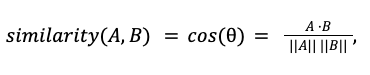

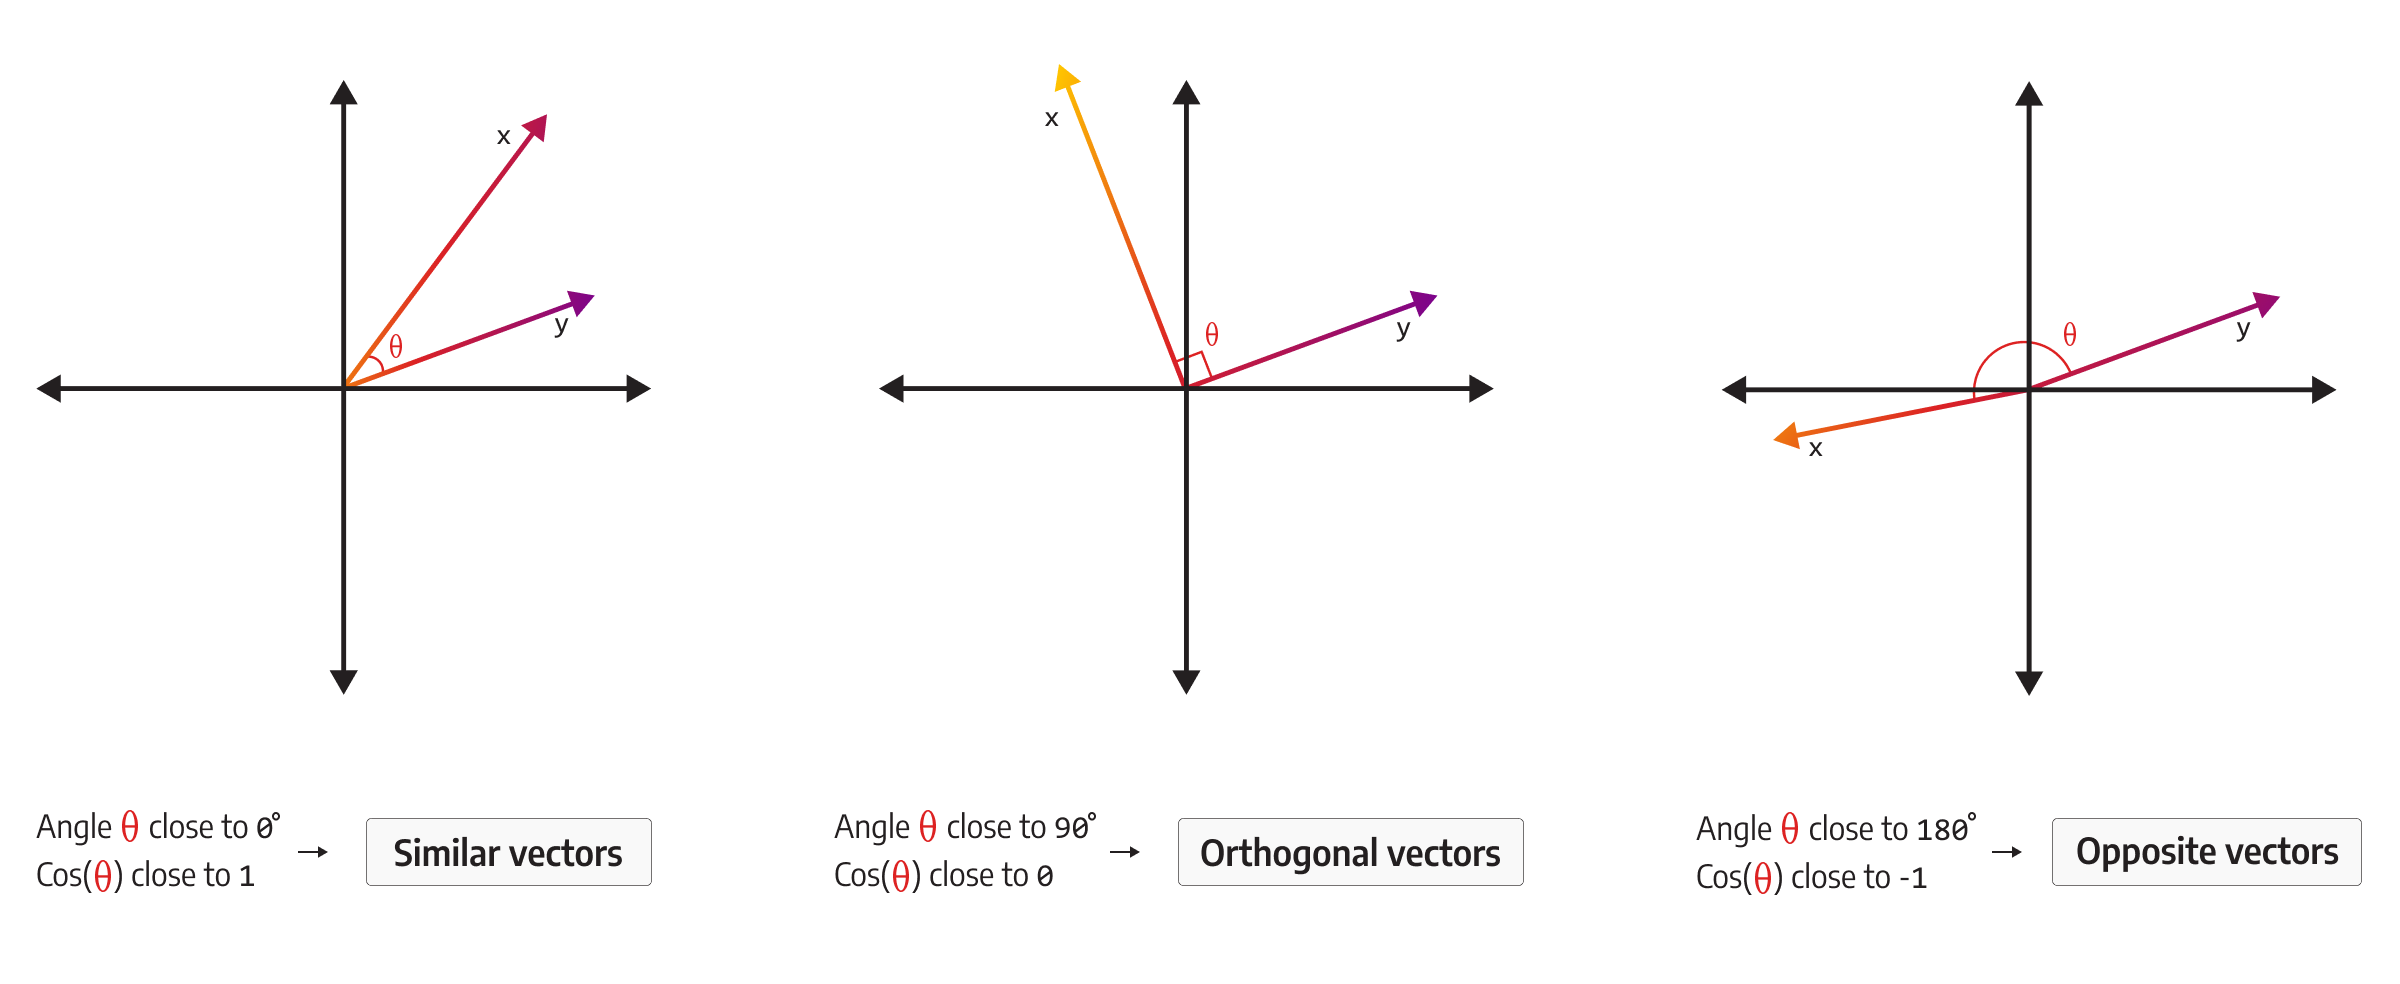

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Define some sample text documents related to social media platforms
twitter = """
Twitter is an online social media and social networking service owned and operated by American company X Corp.,
the legal successor of Twitter, Inc. Twitter users outside the United States are legally served by the Ireland-based
Twitter International Unlimited Company, which makes these users subject to Irish and European Union data protection laws.
On Twitter users post texts, photos and videos known as 'tweets'. Registered users can tweet, like, 'retweet' tweets,
and direct message (DM) other registered users, while unregistered users only have the ability to view public tweets.
Users interact with Twitter through browser or mobile frontend software, or programmatically via its APIs.
"""
facebook = """
Facebook is an online social media and social networking service owned by American technology giant Meta Platforms.
Created in 2004 by Mark Zuckerberg with fellow Harvard College students and roommates Eduardo Saverin, Andrew McCollum,
Dustin Moskovitz, and Chris Hughes, its name derives from the face book directories often given to American university students.
Membership was initially limited to only Harvard students, gradually expanding to other North American universities and,
since 2006, anyone over 13 years old. As of December 2022, Facebook claimed 2.96 billion monthly active users, and ranked third
worldwide among the most visited websites. It was the most downloaded mobile app of the 2010s. Facebook can be accessed from devices
with Internet connectivity, such as personal computers, tablets and smartphones. After registering, users can create a profile
revealing information about themselves. They can post text, photos and multimedia which are shared with any other users who have
agreed to be their friend' or, with different privacy settings, publicly. Users can also communicate directly with each other with
Messenger, join common-interest groups, and receive notifications on the activities of their Facebook friends and the pages they follow.
"""
tiktok = """
TikTok, and its Chinese counterpart Douyin (Chinese: 抖音; pinyin: Dǒuyīn), is a short-form video hosting service owned by ByteDance.
It hosts user-submitted videos, which can range in duration from 3 seconds to 10 minutes. Since their launches, TikTok and Douyin have
gained global popularity.[6][7] In October 2020, TikTok surpassed 2 billion mobile downloads worldwide. Morning Consult named TikTok the
third-fastest growing brand of 2020, after Zoom and Peacock. Cloudflare ranked TikTok the most popular website of 2021,
surpassing google.com.
"""
instagram = """
Instagram is a photo and video sharing social networking service owned by American company Meta Platforms. The app allows users to
upload media that can be edited with filters and organized by hashtags and geographical tagging. Posts can be shared publicly or
with preapproved followers. Users can browse other users' content by tag and location, view trending content, like photos, and follow
other users to add their content to a personal feed. Instagram was originally distinguished by allowing content to be framed only in a
square (1:1) aspect ratio of 640 pixels to match the display width of the iPhone at the time. In 2015, this restriction was eased with
an increase to 1080 pixels. It also added messaging features, the ability to include multiple images or videos in a single post, and a
Stories feature—similar to its main competitor Snapchat—which allowed users to post their content to a sequential feed, with each post
accessible to others for 24 hours. As of January 2019, Stories is used by 500 million people daily.
"""


# Create a list of documents to analyze
documents = [twitter, facebook, tiktok, instagram]

# Create a CountVectorizer to convert the text into a numerical representation
#count_vectorizer = CountVectorizer(stop_words="english")  # Use stop words to filter common English words
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# Convert the sparse matrix to a dense DataFrame for better readability
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(
   doc_term_matrix,
   columns=count_vectorizer.get_feature_names_out(),
   index=["twitter", "facebook", "tiktok", "instagram"],
)

# Print the resulting DataFrame, which shows word frequencies in the documents
print("Word Frequencies in Documents:")
df

Word Frequencies in Documents:


,10,1080,13,2004,2006,2010s,2015,2019,2020,2021,...,which,while,who,width,with,worldwide,years,zoom,zuckerberg,抖音
twitter,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
facebook,0,0,1,1,1,1,0,0,0,0,...,1,0,1,0,6,1,1,0,1,0
tiktok,1,0,0,0,0,0,0,0,2,1,...,1,0,0,0,0,1,0,1,0,1
instagram,0,1,0,0,0,0,1,1,0,0,...,1,0,0,1,4,0,0,0,0,0


In [21]:
# Calculate the cosine similarity between the documents
cosine_similarity_matrix = cosine_similarity(df, df)

# Print the cosine similarity matrix, which measures the similarity between documents
print("\nCosine Similarity Between Documents:")
print(cosine_similarity_matrix)


Cosine Similarity Between Documents:
[[1.         0.49812778 0.23269571 0.49395987]
 [0.49812778 1.         0.34922161 0.60352796]
 [0.23269571 0.34922161 1.         0.3047918 ]
 [0.49395987 0.60352796 0.3047918  1.        ]]


In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between platforms
cosine_sim = cosine_similarity(df, df)

# Create a DataFrame to display the cosine similarity scores
platforms = ["twitter", "facebook", "tiktok", "instagram"]
cosine_sim_df = pd.DataFrame(cosine_sim, columns=platforms, index=platforms)

# Print the cosine similarity DataFrame
print("Cosine Similarity between Platforms:")
cosine_sim_df

Cosine Similarity between Platforms:


,twitter,facebook,tiktok,instagram
twitter,1.000000,0.498128,0.232696,0.493960
facebook,0.498128,1.000000,0.349222,0.603528
tiktok,0.232696,0.349222,1.000000,0.304792
instagram,0.493960,0.603528,0.304792,1.000000


In [23]:
# Print cosine similarity scores in descending order
sorted_cosine_sim_df = cosine_sim_df.stack().reset_index().rename(columns={0: "Cosine Similarity"})
sorted_cosine_sim_df = sorted_cosine_sim_df.sort_values(by="Cosine Similarity", ascending=False)

print("Cosine Similarity in Descending Order:")
sorted_cosine_sim_df

Cosine Similarity in Descending Order:


,level_0,level_1,Cosine Similarity
0,twitter,twitter,1.000000
15,instagram,instagram,1.000000
5,facebook,facebook,1.000000
10,tiktok,tiktok,1.000000
7,facebook,instagram,0.603528
13,instagram,facebook,0.603528
1,twitter,facebook,0.498128
4,facebook,twitter,0.498128
3,twitter,instagram,0.493960
12,instagram,twitter,0.493960


The cosine similarity scores represent the similarity between pairs of documents (or in this case, social media platforms) based on the frequency of words they share. Here's how to interpret the scores:

1. The diagonal entries (level_0 and level_1 are the same) always have a cosine similarity of 1.000000. This is because they represent a document being compared to itself, and the similarity is always perfect (1.0) in this case.

2. The entries with cosine similarity values less than 1.000000 but greater than 0.000000 indicate some level of similarity between the corresponding pairs of documents. For instance, Twitter and Instagram have a cosine similarity of 0.493960, which suggests that they share some common words and are somewhat similar in content.

3. The entries with cosine similarity values close to 0.000000 indicate low similarity between the corresponding pairs of documents. For example, Twitter and TikTok have a cosine similarity of 0.232696, indicating that they have less in common in terms of the words used.

4. Among the pairs of documents (social media platforms) in the given cosine similarity scores, the following pairs have high cosine similarity:

5. Facebook and Instagram: Cosine Similarity = 0.603528
   - This pair has the highest cosine similarity among all pairs, indicating a high level of similarity in their content. Facebook and Instagram share many common words.

6. Twitter and Instagram: Cosine Similarity = 0.493960
   - This pair also has a relatively high cosine similarity, suggesting that Twitter and Instagram have a substantial overlap in the words they use.

7. Twitter and Facebook: Cosine Similarity = 0.498128
   - Similar to Twitter and Instagram, Twitter and Facebook also have a relatively high cosine similarity, indicating that they share many common words.

8. Facebook and TikTok: Cosine Similarity = 0.349222
   - While not as high as the previous pairs, Facebook and TikTok still have a moderate level of similarity in their content.

In summary, the pairs involving Facebook, Instagram, Twitter, and TikTok have relatively high cosine similarity scores, indicating that they are more similar in content compared to other pairs. Among these, the highest similarity is observed between Facebook and Instagram.


## Summary:

Cosine similarity is a mathematical metric used to measure the similarity between two non-zero vectors in an n-dimensional space. It is particularly prevalent in text analysis for comparing documents based on their content. The key steps in understanding cosine similarity are as follows:

1. Vector Representation: Each document is represented as a vector in which each dimension corresponds to a unique term (word) from a dataset. The values in the vector represent the importance or frequency of each term within the document.

2. Cosine of the Angle: Cosine similarity quantifies the cosine of the angle between two document vectors. It is calculated by taking the dot product of the vectors and dividing it by the product of their magnitudes.

3. Interpretation: Cosine similarity scores range from -1 to 1. A score of 1 indicates maximum similarity (identical vectors), 0 means no similarity (orthogonal vectors), and -1 indicates maximum dissimilarity (opposite vectors).

Cosine similarity is widely used for document comparison, text clustering, and recommendation systems. It helps identify similar documents or items based on their content and is a fundamental tool in natural language processing.

## Conclusion:

Cosine similarity is a fundamental concept in text analysis, offering a robust way to measure the similarity between documents or items. It enables applications such as document clustering, information retrieval, and content recommendation. Understanding cosine similarity is essential for professionals working with textual data, as it empowers them to make data-driven decisions in various domains.

## Thank you for reading till the end

## -Raviteja